### 1.Download the dataset

### 2.Load the dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3326,3327,15799626,Donaghy,637,Germany,Male,50,4,126345.55,1,0,1,17323.00,1
3100,3101,15735549,Lori,810,Germany,Male,35,3,96814.46,2,1,1,120511.03,0
3851,3852,15697597,Chiemenam,631,France,Male,26,1,149144.61,1,0,1,123697.95,0
3879,3880,15757541,Rickard,778,France,Female,33,9,151772.63,2,0,0,180249.94,1
786,787,15605284,Outtrim,688,France,Male,26,1,0.00,2,1,1,104435.94,0
4717,4718,15580487,Martin,627,Germany,Male,38,8,106922.92,2,0,1,84270.09,0
3653,3654,15744240,Shen,688,Germany,Female,46,0,74458.25,1,0,1,6866.31,0
6014,6015,15747323,Vasilyeva,535,Spain,Male,48,9,109472.47,1,1,0,157358.43,1
8121,8122,15715988,Cockett,793,France,Male,35,2,0.00,2,1,1,79704.12,0
9877,9878,15572182,Onwuamaeze,505,Germany,Female,33,3,106506.77,3,1,0,45445.78,1


### 3.perform below visualization

### Univariate Analysis

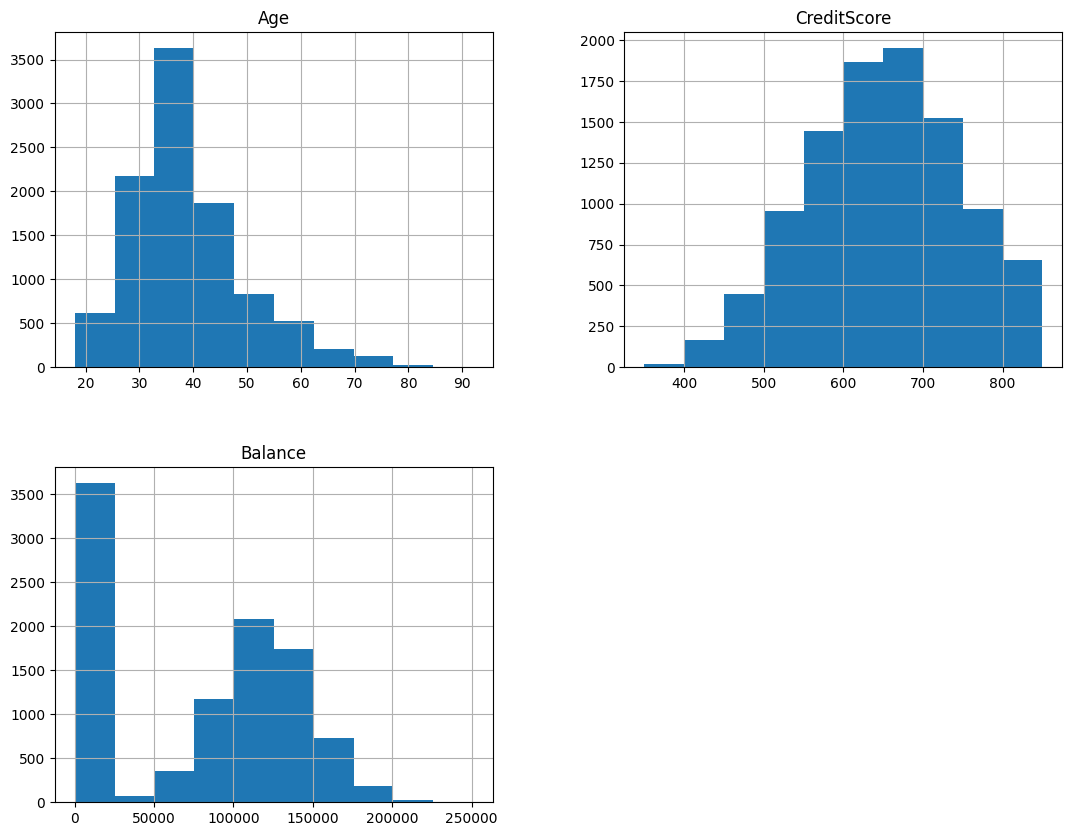

In [6]:
features =['Age', 'CreditScore', 'Balance']
df[features].hist(figsize=(13, 10));

In [17]:
import seaborn as sns

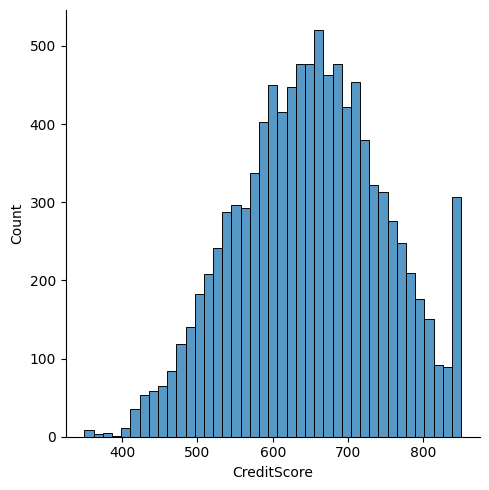

In [11]:
sns.displot(df['CreditScore'])

### Bi-variate Analysis

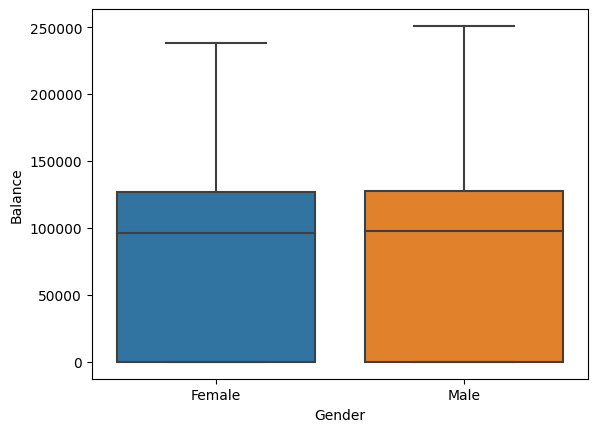

In [22]:
sns.boxplot(x=df['Gender'],y=df['Balance']);

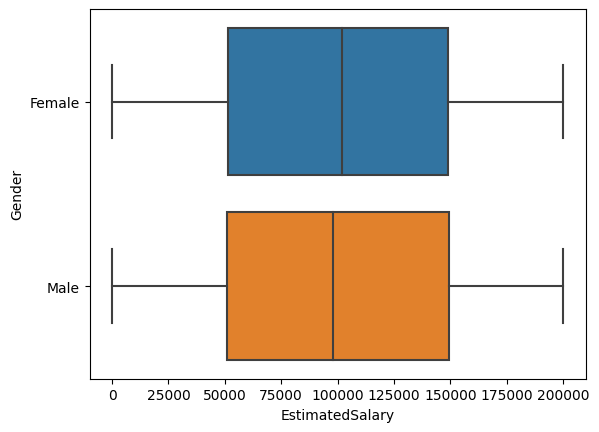

In [24]:
sns.boxplot(x = df['EstimatedSalary'], y = df['Gender'] );

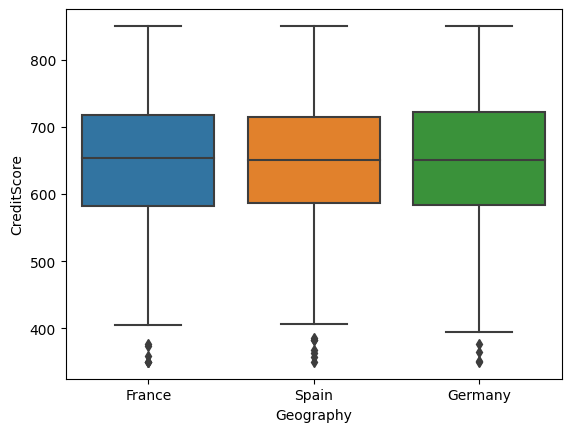

In [27]:
sns.boxplot(x=df['Geography'],y=df['CreditScore']);

### Multi-variate Analysis

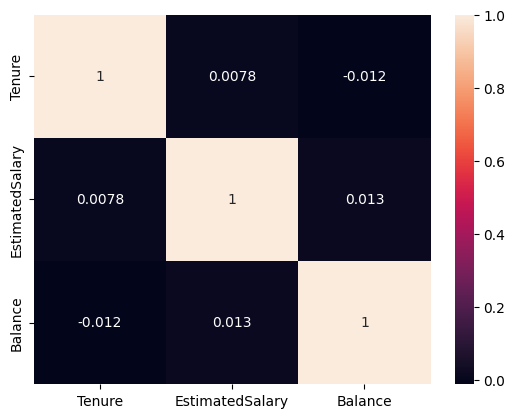

In [30]:
df_1 = pd.DataFrame(df,columns=['Tenure','EstimatedSalary','Balance'])
corrMatrix = df_1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:>

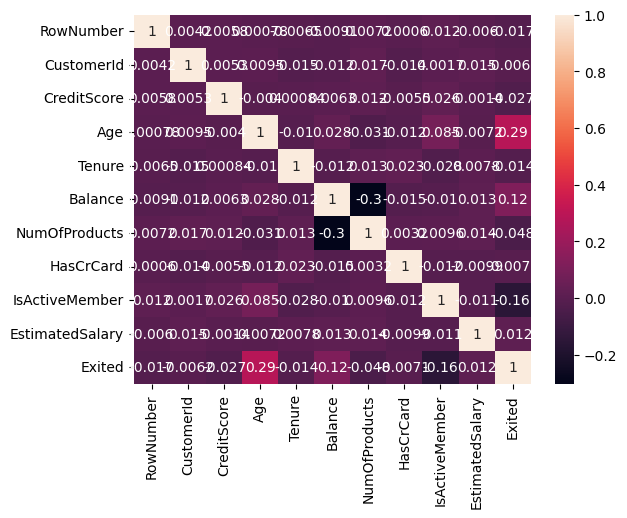

In [32]:
sns.heatmap(df.corr(),annot = True)

### 4. Perform descriptive statistics on the dataset.

In [35]:
df.describe(include=['int64'])

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,1.530200,0.70550,0.515100,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,0.581654,0.45584,0.499797,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.00000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,1.000000,1.00000,1.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,2.000000,1.00000,1.000000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.00000,1.000000,1.000000


In [36]:
df.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [38]:
df['CreditScore'].value_counts()
df['CreditScore'].value_counts().to_frame()
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [40]:
geography_counts=df['Geography'].value_counts().to_frame()
geography_counts.rename(columns={'Geography':'value_counts'},inplace=True)
geography_counts

,value_counts
France,5014
Germany,2509
Spain,2477


### 5. Handle the Missing values.

In [44]:
df.shape

(10000, 14)

In [46]:
df.notnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [49]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
df.fillna(df.mean())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [54]:
df.fillna(df.median())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [56]:
df[df.CreditScore.isnull()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [58]:
df.dropna(subset=['CreditScore','Tenure'],how='any').shape

(10000, 14)

In [60]:
df.dropna(subset=['CreditScore','Tenure'],how='any')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
df.dropna(subset=['CreditScore','Tenure'],how='all').shape

(10000, 14)

In [64]:
df.dropna(subset=['CreditScore','Tenure'],how='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

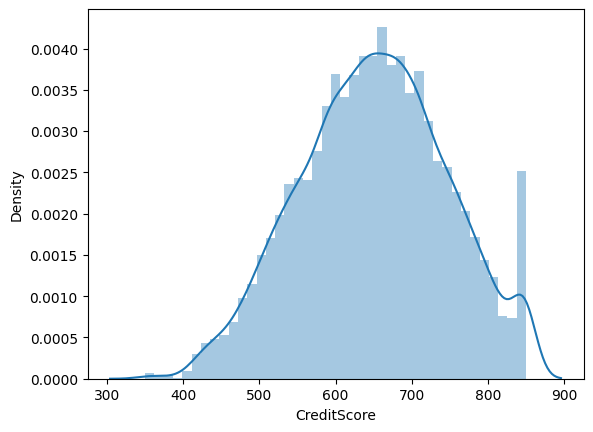

In [66]:
sns.distplot(df['CreditScore'])

<AxesSubplot:>

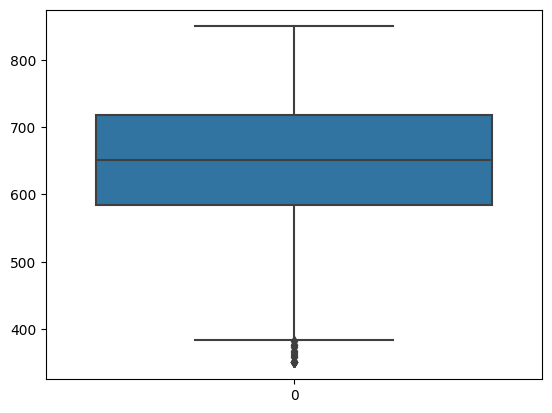

In [68]:
sns.boxplot(df['CreditScore'])

In [70]:
upper_limit = df['CreditScore'].mean() + 3*df['CreditScore'].std()
lower_limit = df['CreditScore'].mean() - 3*df['CreditScore'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 940.488696208391
lower limit: 360.568903791609


In [72]:
df.loc[(df['CreditScore'] > upper_limit) | (df['CreditScore'] < lower_limit)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
8723,8724,15803202,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1
8762,8763,15765173,Lin,350,France,Female,60,3,0.00,1,0,0,113796.15,1
9624,9625,15668309,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


In [74]:
new_df = df.loc[(df['CreditScore'] <= upper_limit) & (df['CreditScore'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 10000
after removing outliers: 9992
outliers: 8


<AxesSubplot:>

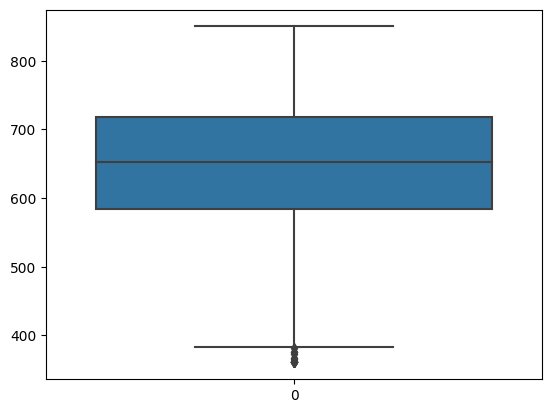

In [76]:
new_df = df.copy()
new_df.loc[(new_df['CreditScore']>=upper_limit), 'CreditScore'] = upper_limit
new_df.loc[(new_df['CreditScore']<=lower_limit), 'CreditScore'] = lower_limit
sns.boxplot(new_df['CreditScore'])

In [78]:
upper_limit = df['CreditScore'].quantile(0.99)
lower_limit = df['CreditScore'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 850.0
lower limit: 432.0


In [81]:
new_df = df.loc[(df['CreditScore'] <= upper_limit) & (df['CreditScore'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 10000
after removing outliers: 9901
outliers: 99


<AxesSubplot:>

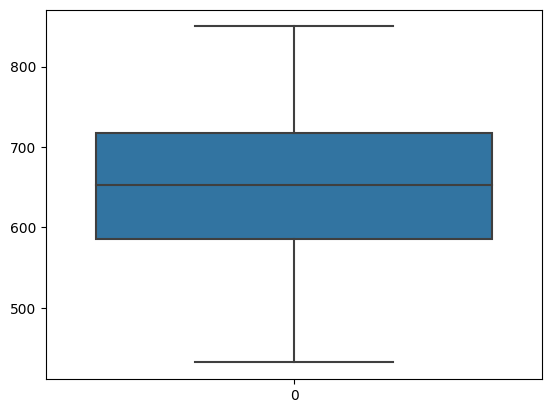

In [83]:
sns.boxplot(new_df['CreditScore'])

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

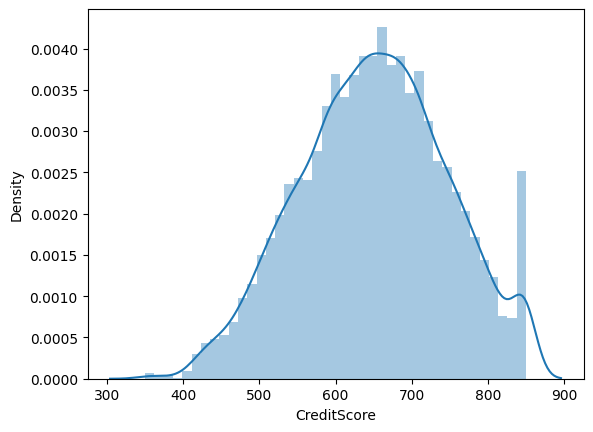

In [85]:
sns.distplot(df['CreditScore'])

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

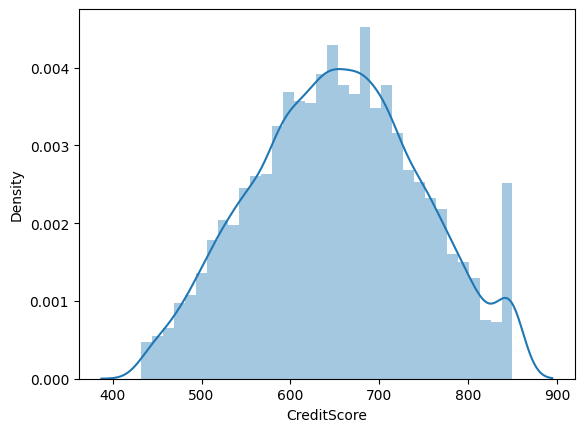

In [87]:
sns.distplot(new_df['CreditScore'])

### 7.Check for Categorical columns and perform encoding.

In [148]:
df = df.iloc[:,:].values
df


array([[1, 15634602, 'Hargrave', ..., 1, 101348.88, 1],
       [2, 15647311, 'Hill', ..., 1, 112542.58, 0],
       [3, 15619304, 'Onio', ..., 0, 113931.57, 1],
       ...,
       [9998, 15584532, 'Liu', ..., 1, 42085.58, 1],
       [9999, 15682355, 'Sabbatini', ..., 0, 92888.52, 1],
       [10000, 15628319, 'Walker', ..., 0, 38190.78, 0]], dtype=object)

### 8. Split the data into dependent and independent variables

In [128]:
df = pd.read_csv("Churn_Modelling.csv")

In [106]:
x=df.iloc[:,4:7]
x


,Geography,Gender,Age
0,France,Female,42
1,Spain,Female,41
2,France,Female,42
3,France,Female,39
4,Spain,Female,43
...,...,...,...
9995,France,Male,39
9996,France,Male,35
9997,France,Female,36
9998,Germany,Male,42


In [146]:
y=df.iloc[:,7]
y

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64

### 9. Scale the independent variables

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df

array([[1, 15634602, 'Hargrave', ..., 1, 101348.88, 1],
       [2, 15647311, 'Hill', ..., 1, 112542.58, 0],
       [3, 15619304, 'Onio', ..., 0, 113931.57, 1],
       ...,
       [9998, 15584532, 'Liu', ..., 1, 42085.58, 1],
       [9999, 15682355, 'Sabbatini', ..., 0, 92888.52, 1],
       [10000, 15628319, 'Walker', ..., 0, 38190.78, 0]], dtype=object)

In [158]:
from sklearn.preprocessing import scale
x= scale(x)
x

array([[-0.32622142],
       [-0.44003595],
       [-1.53679418],
       ...,
       [ 0.60498839],
       [ 1.25683526],
       [ 1.46377078]])

### 10.Splitting the data into Training andTesting

In [118]:
x=np.array(df['CreditScore']).reshape(-1,1)
x.shape

(10000, 1)

In [120]:
print(x)

[[619]
 [608]
 [502]
 ...
 [709]
 [772]
 [792]]


In [151]:
y.shape

(10000,)

In [152]:
print(y)

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64


In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)
x_train.shape

(7000, 1)

In [154]:
y_train.shape

(7000,)

In [155]:
y_test.shape

(3000,)

In [156]:
print(y_train.shape)

(7000,)


In [157]:
print(y_test.shape)

(3000,)
